https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/export/?flg=fr&sort=date&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQVZHIiwieUF4aXMiOiJ0YyIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiNGRjUxNUEifV0sInhBeGlzIjoiZGF0ZSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6ImRheSIsInNvcnQiOiIiLCJjb25maWciOnsiZGF0YXNldCI6ImRvbm5lZXMtc3lub3AtZXNzZW50aWVsbGVzLW9tbSIsIm9wdGlvbnMiOnsiZmxnIjoiZnIifX19XSwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&q.timerange.date=date:%5B2019-08-31T22:00:00Z+TO+2022-10-01T21:59:59Z%5D&location=2,-15.59255,38.57442&basemap=jawg.light

In [428]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [410]:
# import wget

# site_url = 'https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/download/?format=csv&q=date:%5B2019-08-31T22:00:00Z+TO+2022-10-01T21:59:59Z%5D&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B'
# file_name = wget.download(site_url)



In [411]:
# !mv donnees-synop-essentielles-omm.csv data_meteo.csv

In [412]:
df = pd.read_csv('data_meteo.csv',sep=';')
df.head()

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,Altitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code),mois_de_l_annee
0,61980,2022-03-09T22:00:00+01:00,101140.0,-110.0,7.0,170.0,1.7,298.25,295.15,83.0,...,8,Sainte-Marie,97418,CA Intercommunale du Nord de la Réunion (CINOR),249740119.0,La Réunion,974,La Réunion,4.0,3
1,7577,2022-03-10T01:00:00+01:00,102530.0,40.0,0.0,0.0,0.0,277.15,275.45,89.0,...,73,Montélimar,26198,CA Montélimar Agglomération,200040459.0,Drôme,26,Auvergne-Rhône-Alpes,84.0,3
2,81415,2022-03-10T07:00:00+01:00,101200.0,130.0,7.0,0.0,0.0,295.45,295.45,100.0,...,106,Maripasoula,97353,CC de l'Ouest Guyanais,249730037.0,Guyane,973,Guyane,3.0,3
3,7240,2022-03-10T10:00:00+01:00,101970.0,40.0,1.0,130.0,4.6,283.45,278.65,72.0,...,108,Parçay-Meslay,37179,Tours Métropole Val de Loire,243700754.0,Indre-et-Loire,37,Centre-Val de Loire,24.0,3
4,7299,2022-03-10T10:00:00+01:00,102530.0,-20.0,8.0,210.0,0.6,280.85,271.35,51.0,...,263,Blotzheim,68042,CA Saint-Louis Agglomération,200066058.0,Haut-Rhin,68,Grand Est,44.0,3


In [413]:
df.shape

(533562, 82)

In [414]:
df['Date'] = df['Date'].astype('string')

In [415]:
for i in range(df.shape[0]):
    df['Date'][i]=df['Date'][i][0:10]+" "+df['Date'][i][11:19]


In [416]:
df['Date']=pd.to_datetime(df['Date'])


In [417]:
columns = ['Date','region (code)','Température (°C)','Pression au niveau mer','Vitesse du vent moyen 10 mn','Humidité','Pression station','Rafales sur une période','Précipitations dans les 3 dernières heures']

In [418]:
df_Date= df[columns]
df_Date.head()

,Date,region (code),Température (°C),Pression au niveau mer,Vitesse du vent moyen 10 mn,Humidité,Pression station,Rafales sur une période,Précipitations dans les 3 dernières heures
0,2022-03-09 22:00:00,4.0,25.1,101140.0,1.7,83.0,100990.0,4.5,0.2
1,2022-03-10 01:00:00,84.0,4.0,102530.0,0.0,89.0,101600.0,0.6,0.0
2,2022-03-10 07:00:00,3.0,22.3,101200.0,0.0,100.0,99970.0,NaN,0.0
3,2022-03-10 10:00:00,24.0,10.3,101970.0,4.6,72.0,100610.0,6.8,0.0
4,2022-03-10 10:00:00,44.0,7.7,102530.0,0.6,51.0,99200.0,2.0,0.0


In [419]:
df_Date = df_Date.dropna()
df_Date.shape

(388387, 9)

In [420]:
df_region = df_Date

In [421]:
df_Date.set_index('Date', inplace = True)
df_Date.head()

,region (code),Température (°C),Pression au niveau mer,Vitesse du vent moyen 10 mn,Humidité,Pression station,Rafales sur une période,Précipitations dans les 3 dernières heures
Date,,,,,,,,
2022-03-09 22:00:00,4.0,25.1,101140.0,1.7,83.0,100990.0,4.5,0.2
2022-03-10 01:00:00,84.0,4.0,102530.0,0.0,89.0,101600.0,0.6,0.0
2022-03-10 10:00:00,24.0,10.3,101970.0,4.6,72.0,100610.0,6.8,0.0
2022-03-10 10:00:00,44.0,7.7,102530.0,0.6,51.0,99200.0,2.0,0.0
2022-03-10 10:00:00,75.0,11.1,101890.0,3.3,88.0,101610.0,6.6,0.0


In [422]:
df_Date = df_Date.groupby(by=['Date']).mean()
df_Date = df_Date.drop('region (code)')
df_Date.head()

,region (code),Température (°C),Pression au niveau mer,Vitesse du vent moyen 10 mn,Humidité,Pression station,Rafales sur une période,Précipitations dans les 3 dernières heures
Date,,,,,,,,
2019-09-01 02:00:00,78.000000,18.779070,101606.511628,2.655814,75.906977,100039.069767,5.453488,0.023256
2019-09-01 05:00:00,98.697674,16.930233,101583.255814,2.432558,79.465116,99999.534884,4.776744,0.039535
2019-09-01 08:00:00,77.619048,16.990476,101644.285714,2.630952,81.214286,100029.047619,4.614286,0.100000
2019-09-01 11:00:00,96.444444,20.011111,101706.222222,3.357778,68.222222,100197.111111,6.155556,0.028889
2019-09-01 14:00:00,74.681818,22.506818,101712.954545,3.786364,58.022727,100225.909091,6.979545,0.034091


In [423]:
df_Date.shape

(9012, 8)

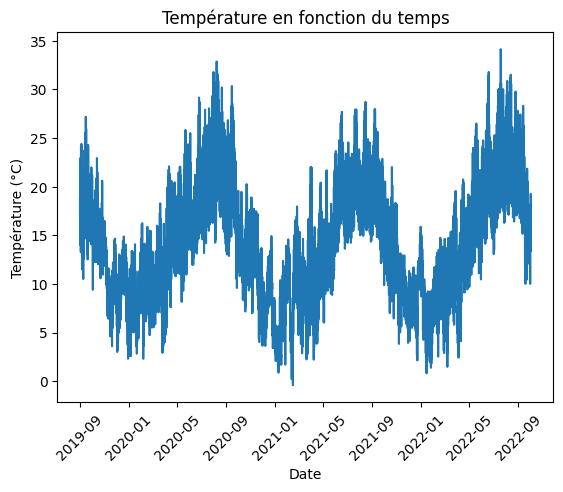

In [424]:
plt.plot(df_Date.index,df_Date['Température (°C)'])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Température (°C)')
plt.title('Température en fonction du temps')
plt.show()

In [425]:
df_region = df_region.groupby(by=['Date','region (code)']).mean()
df_region.head()

Température (°C)  Pression au niveau mer  \
Date                region (code)                                             
2019-09-01 02:00:00 3.0                       25.20                101300.0   
                    4.0                       20.20                101810.0   
                    11.0                      18.20                101550.0   
                    24.0                      17.95                101650.0   
                    27.0                      23.00                101430.0   

                                   Vitesse du vent moyen 10 mn  Humidité  \
Date                region (code)                                          
2019-09-01 02:00:00 3.0                                    0.0      89.0   
                    4.0                                    4.4      75.0   
                    11.0                                   2.6      71.0   
                    24.0                                   2.4      68.5   
                    27.0                                   3.0      49.0   

                                   Pression station  Rafales sur une période  \
Date                region (code)                                              
2019-09-01 02:00:00 3.0                    101210.0                      1.6   
                    4.0                    101660.0                      6.8   
                    11.0                   100490.0                      4.5   
                    24.0                   100020.0                      4.9   
                    27.0                    98830.0                      5.9   

                                   Précipitations dans les 3 dernières heures  
Date                region (code)                                              
2019-09-01 02:00:00 3.0                                                   0.0  
                    4.0                                                  -0.1  
                    11.0                                                  0.0  
                    24.0                                                  0.0  
                    27.0                                                  0.0

In [426]:
df_region = df_region.reset_index(level=['Date','region (code)'])
df_region

,Date,region (code),Température (°C),Pression au niveau mer,Vitesse du vent moyen 10 mn,Humidité,Pression station,Rafales sur une période,Précipitations dans les 3 dernières heures
0,2019-09-01 02:00:00,3.0,25.20,101300.0,0.000000,89.000000,101210.0,1.600000,0.000000
1,2019-09-01 02:00:00,4.0,20.20,101810.0,4.400000,75.000000,101660.0,6.800000,-0.100000
2,2019-09-01 02:00:00,11.0,18.20,101550.0,2.600000,71.000000,100490.0,4.500000,0.000000
3,2019-09-01 02:00:00,24.0,17.95,101650.0,2.400000,68.500000,100020.0,4.900000,0.000000
4,2019-09-01 02:00:00,27.0,23.00,101430.0,3.000000,49.000000,98830.0,5.900000,0.000000
...,...,...,...,...,...,...,...,...,...
158530,2022-10-01 23:00:00,84.0,15.80,102400.0,1.833333,79.333333,99870.0,4.966667,-0.033333
158531,2022-10-01 23:00:00,93.0,18.50,102165.0,3.400000,78.500000,101820.0,5.200000,0.000000
158532,2022-10-01 23:00:00,94.0,17.75,102265.0,2.400000,67.000000,102140.0,4.650000,0.000000
158533,2022-10-01 23:00:00,975.0,12.20,101570.0,8.000000,90.000000,101490.0,12.300000,0.000000


ValueError: x and y must have same first dimension, but have shapes (158535,) and (10282,)

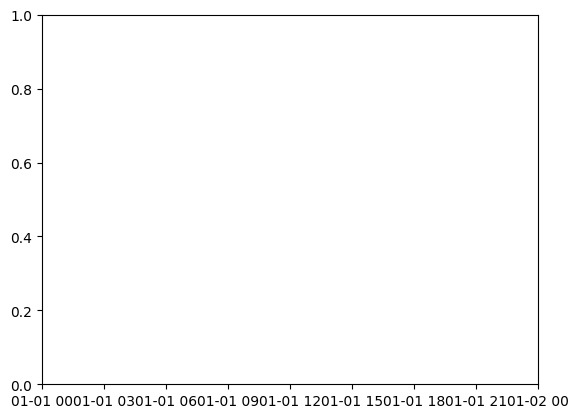

In [434]:
plt.plot(df_region['Date'],df_region['Température (°C)'])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Température (°C)')
plt.title('Température en fonction du temps')



plt.show()